# Data creation

The following notebook explains the various functions in the current folder, i.e. all the functions related for datacreation.





In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Gating of stimulus

The following section explains the functions related to handling onset, offset, gaps, etc. of stimuli.


### `generate_time_vector`

All stimulus creations rely on time; it's time-series signals, thus we need a discrete time entity to relate the signal with. For this, we use the function `generate_time_vector`.
The function is simple, set a start- and end-time and choose the sampling rate.

```
    generate_time_vector(start, end, fs)
```
Example:

In [2]:
from data_creation.time.time import generate_time_vector

x = generate_time_vector(0, 1, 10)
print('generate_time_vector(0, 1, 10):', x)

generate_time_vector(0, 1, 10): [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


## Gating of stimulus

The following section explains the functions related to handling onset, offset, gaps, etc. of stimuli.


### `ramp`

Before diving into the signal generators, let's first take a look at ramping.
Specifically for gap detection, and any onset/offset of some sound, we need to ramp the signal to avoid spectral splatter from the onset etc.

Here's an introduction to the generalised ramping function `ramp`

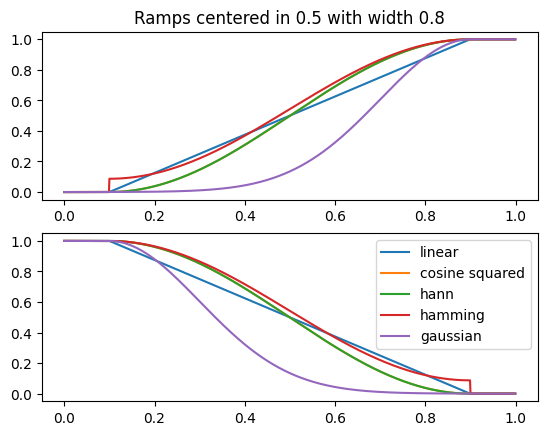

In [3]:
from data_creation.ramp.ramp import ramp
from data_creation.ramp.functions import linear_ramp_func
from data_creation.ramp.functions import cosine_squared_ramp_func
from data_creation.ramp.functions import hann_ramp_func
from data_creation.ramp.functions import hamming_ramp_func
from data_creation.ramp.functions import gaussian_ramp_func

t = generate_time_vector(0, 1, 1000)

gamma_t = 0.5
width = 0.8

fig, axs = plt.subplots(2)
axs[0].set_title(f'Ramps centered in {gamma_t} with width {width}')
for invert, ax in zip([False, True], axs):
    ax.plot(t, ramp(t, gamma_t=gamma_t, width=width, ramp_function=linear_ramp_func, invert=invert), label='linear')
    ax.plot(t, ramp(t, gamma_t=gamma_t, width=width, ramp_function=cosine_squared_ramp_func, invert=invert), label='cosine squared')
    ax.plot(t, ramp(t, gamma_t=gamma_t, width=width, ramp_function=hann_ramp_func, invert=invert), label='hann')
    ax.plot(t, ramp(t, gamma_t=gamma_t, width=width, ramp_function=hamming_ramp_func, invert=invert), label='hamming')
    ax.plot(t, ramp(t, gamma_t=gamma_t, width=width, ramp_function=gaussian_ramp_func, invert=invert), label='gaussian')
plt.legend()
plt.show()


### `ramp_with_overlap`

A usual use-case for ramping is to both have an onset- and offset-ramp. This motivates the use of `ramp_with_overlap`, that simply takes

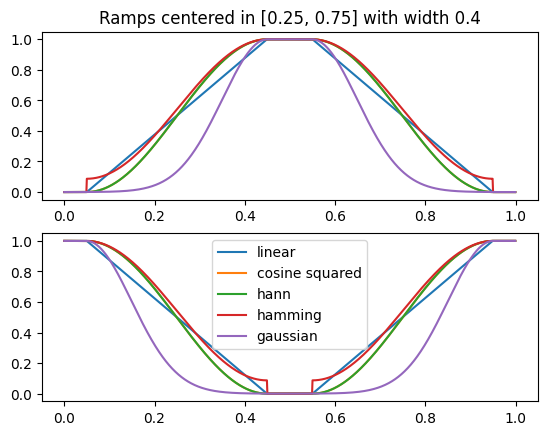

In [4]:
from data_creation.ramp.ramp import ramp_onoff


t = generate_time_vector(0, 1, 1000)

gamma_t = [0.25, 0.75]
width = 0.4

fig, axs = plt.subplots(2)
axs[0].set_title(f'Ramps centered in {gamma_t} with width {width}')
for invert, ax in zip([False, True], axs):
    ax.plot(t, ramp_onoff(t, gamma_t=gamma_t, width=width, ramp_function=linear_ramp_func, invert=invert), label='linear')
    ax.plot(t, ramp_onoff(t, gamma_t=gamma_t, width=width, ramp_function=cosine_squared_ramp_func, invert=invert), label='cosine squared')
    ax.plot(t, ramp_onoff(t, gamma_t=gamma_t, width=width, ramp_function=hann_ramp_func, invert=invert), label='hann')
    ax.plot(t, ramp_onoff(t, gamma_t=gamma_t, width=width, ramp_function=hamming_ramp_func, invert=invert), label='hamming')
    ax.plot(t, ramp_onoff(t, gamma_t=gamma_t, width=width, ramp_function=gaussian_ramp_func, invert=invert), label='gaussian')
plt.legend()
plt.show()

### `ramp_onoff_with_gap`

The bread-and-butter of ramp when generating gap-detection signals. Uses two instances of `ramp_onoff` to generate onset and offset of a stimuli, as well as a gap in between.
This function is thus a utilisation of the more general functions for ease-of-use.



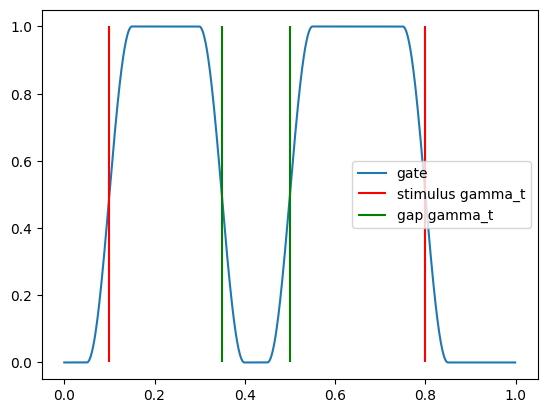

In [5]:
from data_creation.ramp.ramp import ramp_onoff_with_gap


t = generate_time_vector(0, 1, 1000)

s_gamma_t = [0.1, 0.8]
g_gamma_t = [0.35, 0.5]
width = 0.1

fig = plt.figure()
plt.plot(t,
         ramp_onoff_with_gap(t,
                             stim_gamma_t=s_gamma_t,
                             gap_gamma_t=g_gamma_t,
                             width=width,
                             ramp_function=hann_ramp_func),
         label='gate')
plt.vlines(s_gamma_t, 0, 1, 'r', label='stimulus gamma_t') # illustrate position of stimulus ramps
plt.vlines(g_gamma_t, 0, 1, 'g', label='gap gamma_t') # illustrate position of gap ramps
plt.legend()
plt.show()

## Generating sound

Now we can control the gating of a stimulus, let's look into creating the actual sound.

